In [29]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

In [81]:
data = pd.read_csv('counterfeit_train.csv')

In [31]:
data.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


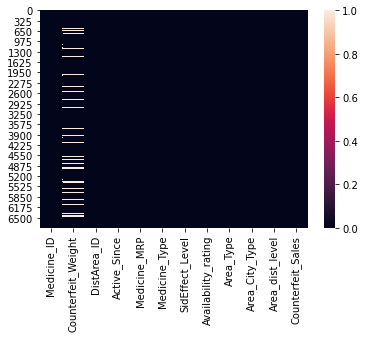

In [32]:
sns.heatmap(data.isnull())

In [33]:
data['Counterfeit_Weight'].fillna(np.round_(data['Counterfeit_Weight'].mean()), inplace=True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          6818 non-null   object 
 1   Counterfeit_Weight   6818 non-null   float64
 2   DistArea_ID          6818 non-null   object 
 3   Active_Since         6818 non-null   int64  
 4   Medicine_MRP         6818 non-null   float64
 5   Medicine_Type        6818 non-null   object 
 6   SidEffect_Level      6818 non-null   object 
 7   Availability_rating  6818 non-null   float64
 8   Area_Type            6818 non-null   object 
 9   Area_City_Type       6818 non-null   object 
 10  Area_dist_level      6818 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [35]:
data['Active_Since'].value_counts()

1983    1166
2005     760
1995     749
1985     749
2002     748
1997     739
2000     736
2007     729
1996     442
Name: Active_Since, dtype: int64

In [36]:
data['DistArea_ID'].value_counts()

Area017    760
Area046    749
Area013    749
Area035    748
Area049    739
Area045    736
Area027    735
Area018    729
Area010    442
Area019    431
Name: DistArea_ID, dtype: int64

In [37]:
data['SidEffect_Level'].value_counts()

mild        4434
critical    2384
Name: SidEffect_Level, dtype: int64

In [38]:
data['Area_Type'].value_counts()

DownTown              4481
MidTownResidential     873
CityLimits             735
Industrial             729
Name: Area_Type, dtype: int64

In [39]:
data['Area_City_Type'].value_counts()

Tier 3    2655
Tier 2    2244
Tier 1    1919
Name: Area_City_Type, dtype: int64

In [40]:
data['Area_dist_level'].value_counts()

Medium     2203
Unknown    1938
Small      1928
High        749
Name: Area_dist_level, dtype: int64

In [41]:
X = data.drop(['Counterfeit_Sales'], 1)
y = data['Counterfeit_Sales']

In [42]:
X.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type',
       'Area_dist_level'],
      dtype='object')

In [43]:
dummy = pd.get_dummies(X['DistArea_ID'], drop_first=True)
X = pd.concat([X, dummy], axis=1)

In [44]:
dummy = pd.get_dummies(X['Active_Since'], drop_first=True)
X = pd.concat([X, dummy], axis=1)

In [45]:
dummy = pd.get_dummies(X['Medicine_Type'], drop_first=True)
X = pd.concat([X, dummy], axis=1)

In [46]:
dummy = pd.get_dummies(X['SidEffect_Level'], drop_first=True)
X = pd.concat([X, dummy], axis=1)

In [47]:
dummy = pd.get_dummies(X['Area_Type'], drop_first=True)
X = pd.concat([X, dummy], axis=1)

In [48]:
dummy = pd.get_dummies(X['Area_City_Type'], drop_first=True)
X = pd.concat([X, dummy], axis=1)

In [49]:
dummy = pd.get_dummies(X['Area_dist_level'], drop_first=True)
X = pd.concat([X, dummy], axis=1)

In [50]:
for col in ['Medicine_ID','DistArea_ID', 'Active_Since', 'Medicine_Type', 'SidEffect_Level', 
            'Area_Type', 'Area_City_Type','Area_dist_level']:
    X.drop([col],1,inplace=True)

In [51]:
X.head()

,Counterfeit_Weight,Medicine_MRP,Availability_rating,Area013,Area017,Area018,Area019,Area027,Area035,Area045,Area046,Area049,1985,1995,1996,1997,2000,2002,2005,2007,Antacids,Antibiotics,Antifungal,Antimalarial,Antipyretics,Antiseptics,Antiviral,Cardiac,Hreplacements,Mstablizers,MuscleRelaxants,OralContraceptives,Statins,Stimulants,Tranquilizers,mild,DownTown,Industrial,MidTownResidential,Tier 2,Tier 3,Medium,Small,Unknown
0,13.100,160.2366,0.070422,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,14.000,110.4384,0.013000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,9.025,259.4092,0.060783,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
3,11.800,99.9830,0.065555,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0
4,14.000,56.4402,0.248859,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [53]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=600,criterion='mse',max_depth=6,bootstrap=True,min_samples_split=2)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [54]:
y_pred = regressor.predict(X_test)

In [55]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.6004349753754151

In [56]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 749.3528384643565


#With PCA

In [ ]:
data = pd.read_csv('counterfeit_train.csv')

In [82]:
data['sideffect']=np.where(data['SidEffect_Level']=='mild',1,0)
data=data.drop('SidEffect_Level',axis=1)

In [83]:
data['DT']=np.where(data['Area_Type']=='DownTown',1,0)
data['MTR']=np.where(data['Area_Type']=='MidTownResidential',1,0)
data['AreaName']=np.where(data['Area_Type']=='CityLimits',1,0)
data=data.drop('Area_Type',axis=1)

In [85]:
data['T3']=np.where(data['Area_City_Type']=='Tier 3',1,0)
data['T2']=np.where(data['Area_City_Type']=='Tier 2',1,0)
data=data.drop(['Area_City_Type'],axis=1)

In [86]:
data['medium']=np.where(data['Area_dist_level']=='Medium',1,0)
data['unknown']=np.where(data['Area_dist_level']=='Unknown',1,0)
data['small']=np.where(data['Area_dist_level']=='Small',1,0)
data=data.drop('Area_dist_level',axis=1)

In [88]:
cat_cols=data.select_dtypes(['object']).columns

In [89]:
cat_cols

Index(['Medicine_ID', 'DistArea_ID', 'Medicine_Type'], dtype='object')

In [91]:
MT_dummies=pd.get_dummies(data['Medicine_Type'],prefix='MM')

In [92]:
data=pd.concat([data,MT_dummies],axis=1)
data=data.drop(['Medicine_Type','MM_Antiviral'],axis=1)

In [93]:
data=data.drop(['Medicine_ID','DistArea_ID'],axis=1)

In [95]:
data['Counterfeit_Weight'].fillna(np.round_(data['Counterfeit_Weight'].mean()), inplace=True)

In [96]:
train, test = train_test_split(data, test_size=.2, random_state=2)

In [97]:
train.shape

(5454, 29)

In [98]:
test.shape

(1364, 29)

In [100]:
x_train=train.drop('Counterfeit_Sales',axis=1)
y_train=train['Counterfeit_Sales']
x_test=test.drop('Counterfeit_Sales',axis=1)
y_test=test['Counterfeit_Sales']

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
rfr=RandomForestRegressor(n_estimators=600,criterion='mse',max_depth=6,bootstrap=True,min_samples_split=2)

In [103]:
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [104]:
y_pred=rfr.predict(x_test)

In [106]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mean_absolute_error(y_test,y_pred)

756.6746988080578

In [107]:
r2_score(y_test,y_pred)

0.5814439741059725

In [108]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [109]:
rmse(y_test,y_pred)

1095.9980709485944

In [110]:
sample_data = data.copy()

In [111]:
from sklearn.decomposition import PCA

In [112]:
pca=PCA(n_components=29)

In [113]:
dataset = sample_data.values

In [114]:
pca.fit(dataset)

PCA(copy=True, iterated_power='auto', n_components=29, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [115]:
pca.explained_variance_ratio_

array([9.99064855e-01, 9.03681489e-04, 2.43910078e-05, 6.23672175e-06,
       1.99988711e-07, 1.02801267e-07, 8.61360486e-08, 6.20098659e-08,
       4.97132586e-08, 4.26807421e-08, 3.91959157e-08, 3.34035684e-08,
       3.13166558e-08, 2.88692295e-08, 2.67926570e-08, 2.63229502e-08,
       2.12775612e-08, 1.92241233e-08, 1.68488021e-08, 1.13768353e-08,
       8.84620373e-09, 7.77651848e-09, 7.32724911e-09, 5.89125623e-09,
       4.98384172e-09, 2.07089077e-09, 8.37430367e-10, 1.77005631e-10,
       1.64085710e-10])

In [118]:
target=data['Counterfeit_Sales']

In [119]:
pca = PCA(n_components=4)

pca.fit(dataset)

X_train, X_test, Y_train, Y_test = train_test_split(dataset,target, test_size=0.2)

In [120]:
X_train.shape

(5454, 29)

In [121]:
Y_train.shape

(5454,)

In [122]:
rfr1 = RandomForestRegressor(n_estimators=600,criterion='mse',max_depth=6,bootstrap=True,min_samples_split=2)

In [123]:
rfr1.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [125]:
Y_pred=rfr1.predict(X_test)

In [126]:
mean_absolute_error(Y_test,Y_pred)

7.904415862419802

In [127]:
metrics.r2_score(Y_test,Y_pred)

0.9999018356611584